In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LSTM, Embedding, concatenate
from keras.utils import plot_model

from IPython.display import Image

C:\Users\p\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# #1: Sequential Model과의 비교

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


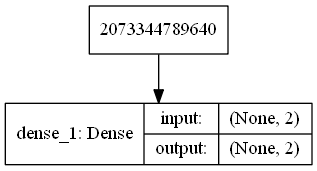

In [2]:
model=Sequential()
model.add(Dense(2, input_shape = (2,)))
model.summary()
plot_model(model, show_shapes=True)
Image('model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


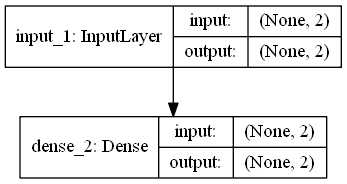

In [3]:
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs = visible, outputs = hidden)
model.summary()
plot_model(model, show_shapes=True)
Image('model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


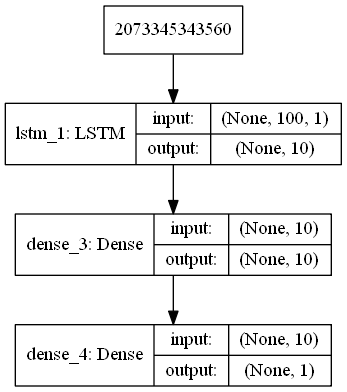

In [4]:
model = Sequential()
model.add(LSTM(10, input_shape = (100,1)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
plot_model(model, show_shapes=True)
Image('model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 1)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


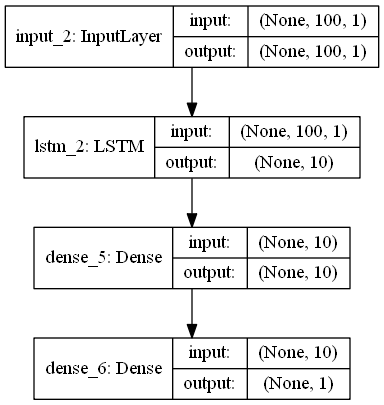

In [5]:
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation = 'relu')(hidden1)
output = Dense(1, activation = 'sigmoid')(hidden2)
model = Model(inputs = visible, outputs = output)
model.summary()
plot_model(model, show_shapes=True)
Image('model.png')

# #2 : Multiple Inputs

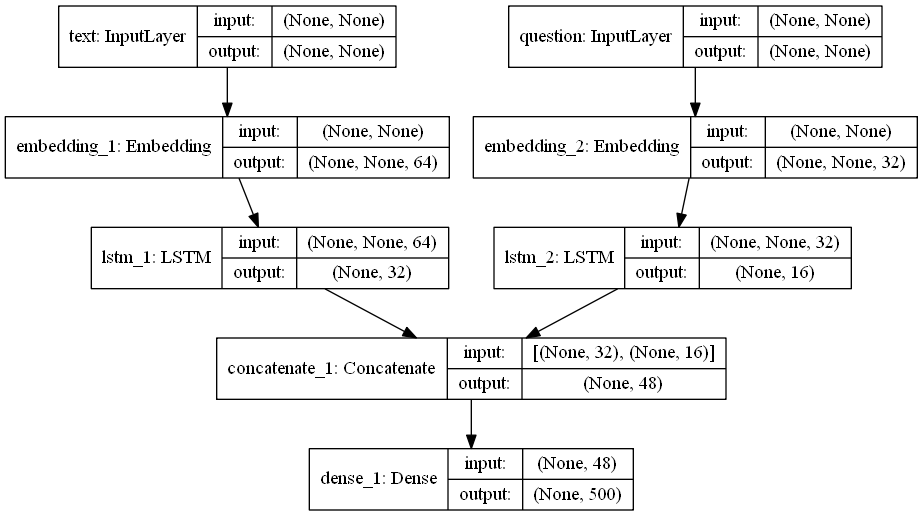

In [2]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

# Input 1
text_input = Input(shape=(None,), name='text')
embedded_text = Embedding(text_vocabulary_size,64)(text_input)
encoded_text = LSTM(32)(embedded_text)

# Input 2
question_input = Input(shape=(None,), name='question')
embedded_question = Embedding(question_vocabulary_size,32)(question_input)
encoded_question = LSTM(16)(embedded_question)

# Concatenation
concatenated = concatenate([encoded_text, encoded_question], axis=-1)
answer = Dense(answer_vocabulary_size, activation='softmax')(concatenated)

# Define a model
model = Model([text_input, question_input], answer)

plot_model(model, show_shapes=True)
Image('model.png')

In [7]:
model.fit([text, question], answers, epochs=10, batch_size=128)
model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128)

NameError: name 'text' is not defined

# #3: Multiple outputs

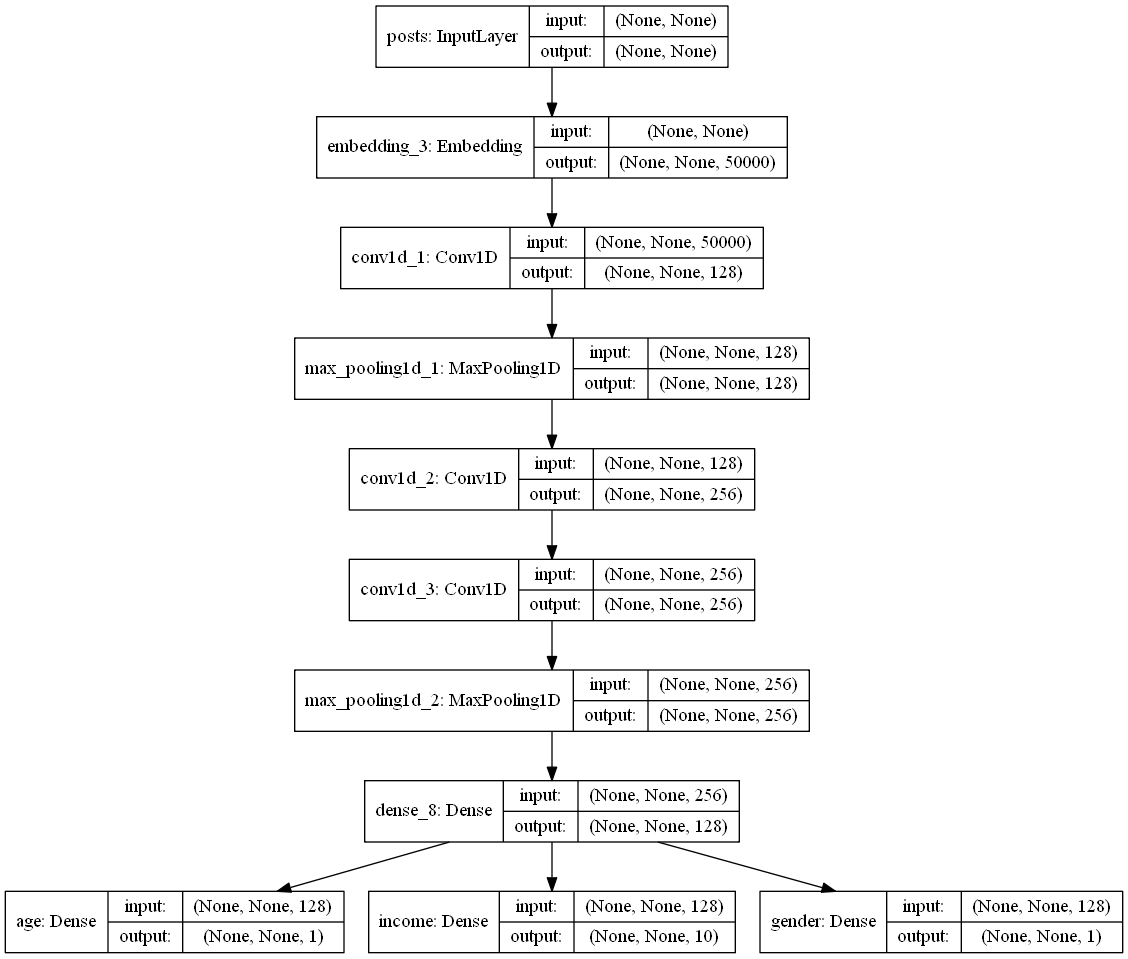

In [8]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = Embedding(vocabulary_size, 256)(posts_input)
x = Conv1D(128, 5, activation='relu')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(1, name='age')(x)# Output 1
income_prediction = Dense(num_income_groups, activation='softmax', name='income')(x)# Output 2
gender_prediction = Dense(1, activation='sigmoid', name='gender')(x)# Output 3

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])# Define a model

plot_model(model, show_shapes=True)
Image('model.png')

In [ ]:
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights=[0.25, 1., 10.])
model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)